# <center>LarkAI Assignmnet</center>

## Import Libraries

In [1]:
# import necessray libraries:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

## Reading all ```".jpg"``` Images

In [2]:
# Folder path
folder_path = 'assignment_folder'

In [3]:
# List all files in the folder
files = os.listdir(folder_path)

In [4]:
# Filter only .jpg files
jpg_files = [file for file in files if file.endswith('.jpg')]

In [5]:

# Read all the images and store in variables
image_variables = {}

for i, jpg_file in enumerate(jpg_files, start=1):
    image_path = os.path.join(folder_path, jpg_file)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image_variables[f'img_{i}'] = img


### Reading ```.npy``` signal (given for 1st image)

In [6]:
# read given singal values in .npy files:

given_signal_1 = np.load(os.path.join(folder_path, "signal.npy"))

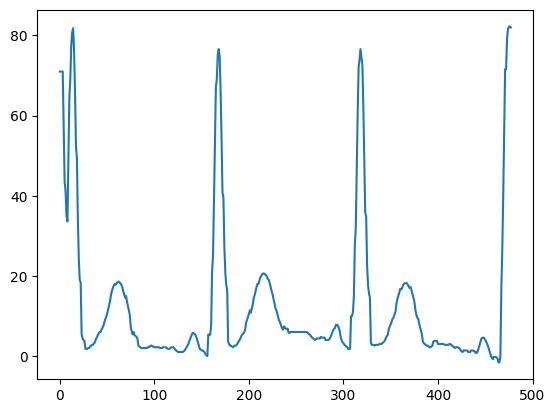

In [7]:
plt.plot(given_signal_1)

## plotting Image and ```.npy``` Signal

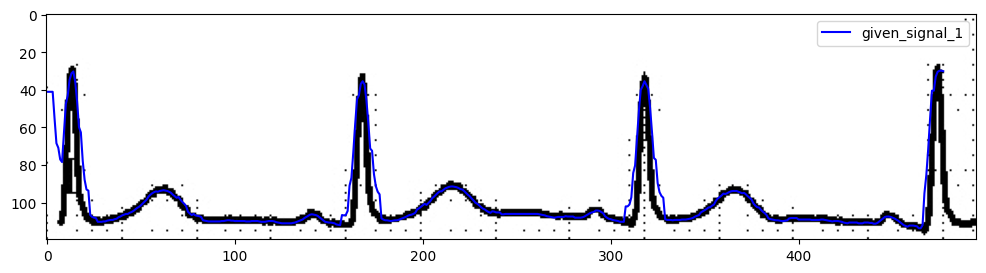

In [8]:
# plot the given image and the given numpy signal values:

plt.figure(figsize=(12,4))
plt.plot(112-given_signal_1, label = "given_signal_1", color = "b")
plt.imshow(image_variables['img_1'], label = "actual_image_1", cmap="gray")
plt.legend()
plt.show()

## Finding Signal Value:

In [9]:
# finding the top and bottom value for black pixels:

def find_top(img):
    top_pixel_index = []

    for i in range(img.shape[1]):
        index = False

        for j in range(img.shape[0]):

            if img[j][i] == 0:
                top_pixel_index.append(j)
                index = True
                break
        
        if not index:

            if i == 0:
                top_pixel_index.append(np.argmin(img[0]))
            else:
                top_pixel_index.append(top_pixel_index[i-1])

    return np.asarray(top_pixel_index)


# # now find the pixel values from lower axis label:
# def find_below_pixels(img):
#     return img.shape[0]-8-find_top(img)


## Plot and Save

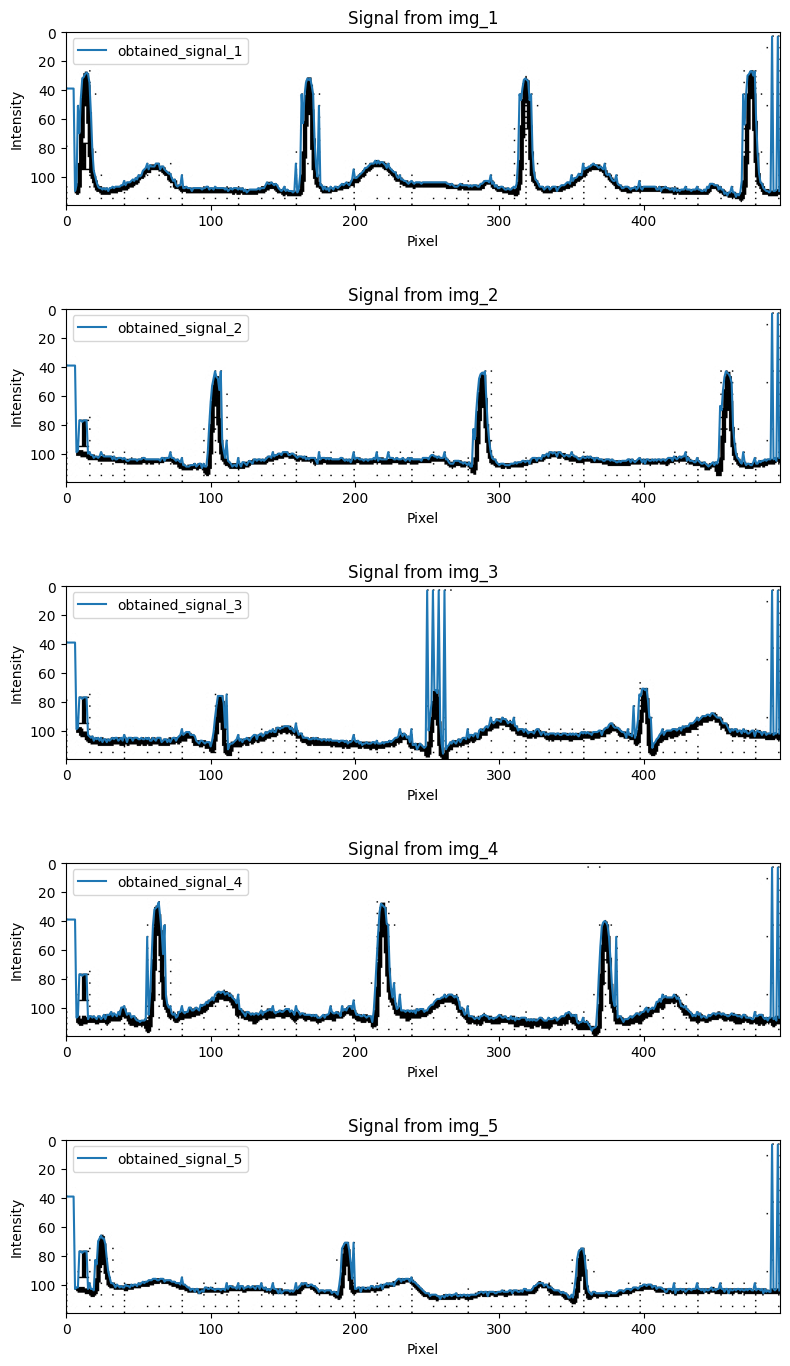

In [10]:
# Now, plot each given image with the obtained signal:

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 14))

# Iterate through images
for i, (img_name, img) in enumerate(image_variables.items(), start=1):
    # Find below pixels
    below_pixels = find_top(img)
    
    # Save below pixels as numpy array
    np.save(f'signal_{i}.npy', below_pixels)
    
    # Plot the signal
    axes[i-1].plot(below_pixels, label = f"obtained_signal_{i}")
    axes[i-1].imshow(img, cmap = "gray", label = f"actual_image_{i}")
    axes[i-1].set_title(f'Signal from {img_name}')
    axes[i-1].set_xlabel('Pixel')
    axes[i-1].set_ylabel('Intensity')
    axes[i-1].legend()

plt.tight_layout()
plt.show()

All ECG Images signals are saved in ```.npy``` format as:
- signal_1.npy
- signal_2.npy
- signal_3.npy
- signal_4.npy
- signal_5.npy